# This Project will answer following questions



#### 1.   Which countries with maximum Total cases, Deaths, Recovered & active cases.  (Tree map)
#### 2.   What is the trend of Confirmed Deaths Recovered Active cases.  (Line Plot)
#### 3.   20 most effected countries.  (Bar Plot)
#### 4.   20 countries that are badly affected by corona. (Bar Plot) 4. 20 countries that are badly affected by corona. (Bar Plot)
#### 5.   Top 20 countries of Total Confirmed Cases, Total Recovered Cases, Total Deaths,Total Active Cases. (Bar chart)
#### 6.   Worst affected countries by WHO. (Pie chart in donut shape, Bar chart)
#### 7.   Visualize Confirmed, Active, Recovered , Deaths Cases(entire statistics ) of a particular country.
```

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for better interactive visualization
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [16]:
import os

## Import datafiles 
```

In [17]:
files=os.listdir(r'C:\Users\shans\Downloads\Covid-19_data\Covid-19')
files

['country_wise_latest.csv',
 'covid_19_clean_complete.csv',
 'day_wise.csv',
 'full_grouped.csv',
 'usa_country_wise.csv',
 'worldometer_data.csv']

In [18]:
### create a function to read data aggain & again 
def read_data(path,filename):
    return pd.read_csv(path+'/'+filename)
    

In [19]:
path= r'C:\Users\shans\Downloads\Covid-19_data\Covid-19'
world_data=read_data(path,'worldometer_data.csv')

In [20]:
day_wise=read_data(path,files[2])

In [21]:
group_data=read_data(path,files[3])

In [22]:
usa_data=read_data(path,files[4])

In [23]:
province_data=read_data(path,files[1])

## 1. Which Country has maximum Total cases, Deaths, Recovered & active cases. 
##### Create TreeMap Representation of data
```

In [24]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

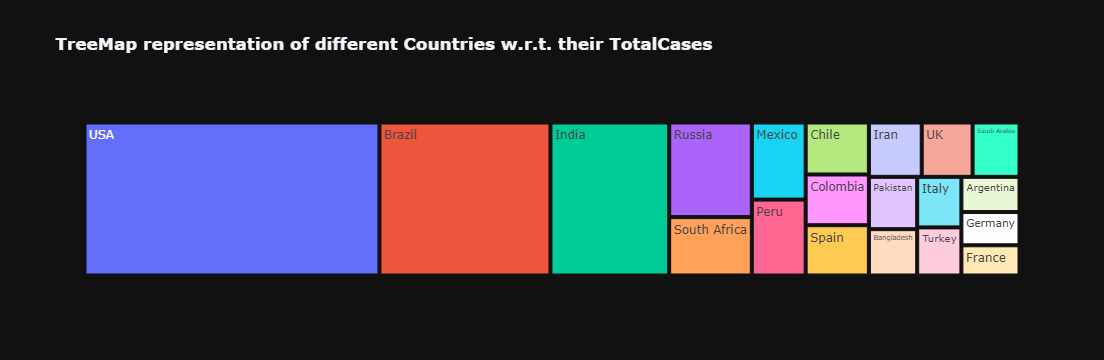

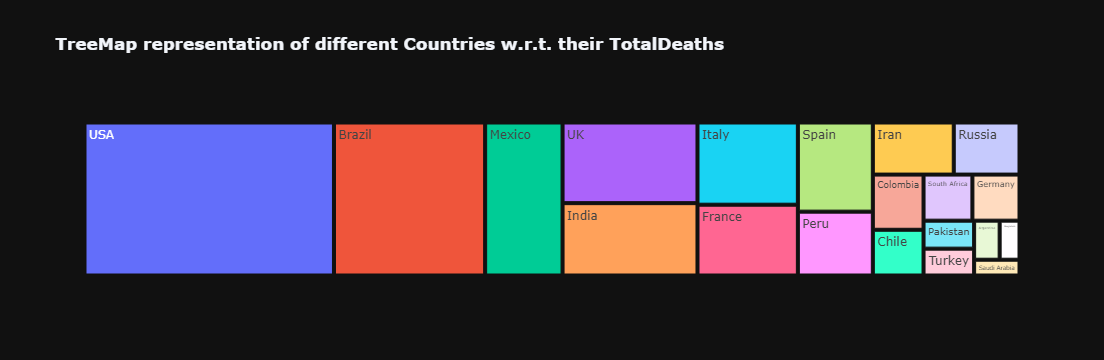

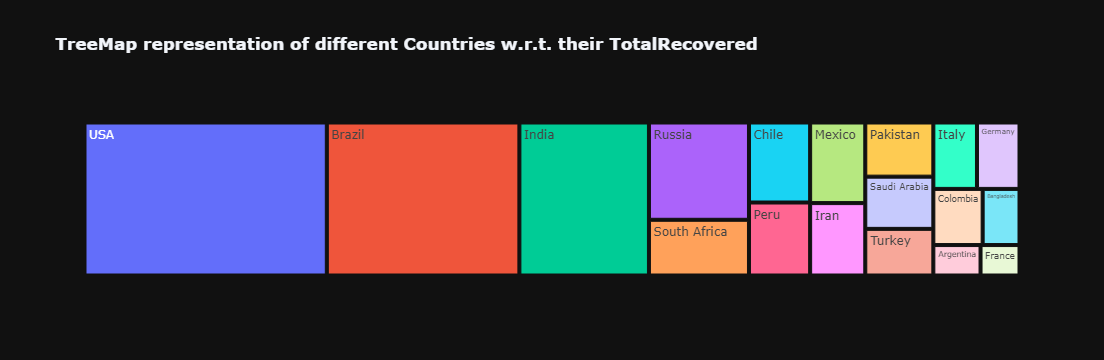

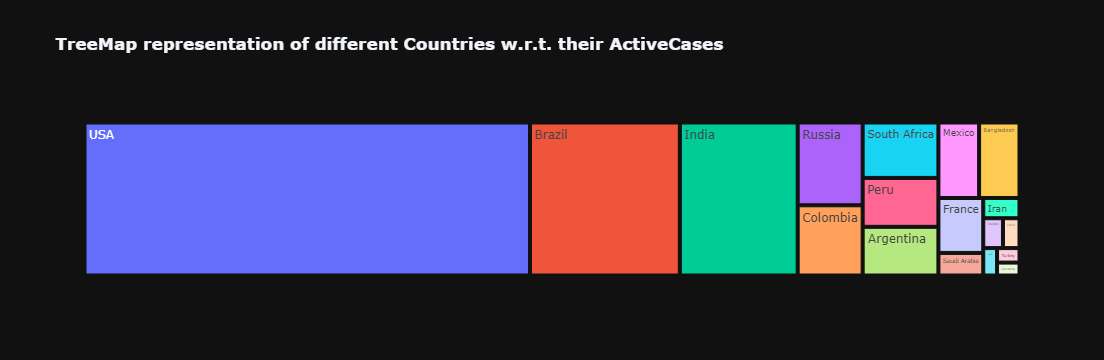

In [29]:
columns=['TotalCases','TotalDeaths','TotalRecovered','ActiveCases']
for i in columns:
    fig=px.treemap(world_data[0:20],values=i,path=['Country/Region'],template="plotly_dark",title="<b>TreeMap representation of different Countries w.r.t. their {}</b>".format(i))
    fig.show()

## 2. what is the trend of Confirmed Deaths Recovered Active cases
#### Line Plot
```

In [ ]:
fig=px.line(day_wise,x="Date",y=["Confirmed","Deaths","Recovered","Active"],title="covid cases w.r.t. date",template="plotly_dark")
fig.show()


## 3. find 20 most effected countries
#### BarPlot Representation of Population to Tests Done Ratio
```

In [26]:
pop_test_ratio=world_data.iloc[0:20]['Population']/world_data.iloc[0:20]['TotalTests']

In [27]:
pop_test_ratio

0       5.245489
1      16.106896
2      62.365033
3       4.911040
4      18.852446
5     122.115932
6      13.241331
7      10.866949
8      28.269105
9       6.618696
10     32.187237
11      3.877883
12      9.589865
13    107.484026
14    134.558952
15      8.514790
16     16.613857
17     56.934398
18      9.760649
19     16.353942
dtype: float64

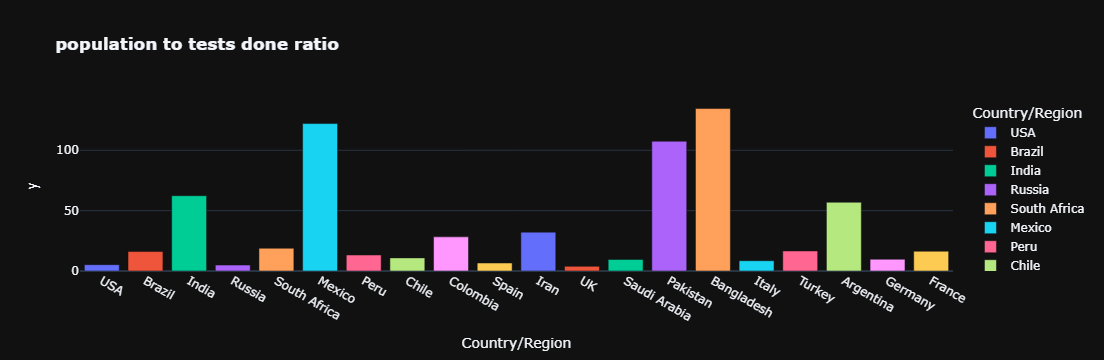

In [28]:
fig=px.bar(world_data.iloc[0:20],color='Country/Region',y=pop_test_ratio,x='Country/Region',template="plotly_dark",title="<b>population to tests done ratio</b>")
fig.show()

##  4. 20 countries that are badly affected by corona 
#### BarPlot Representation of CoronaViruses Cases w.r.t Time
```

In [18]:
fig=px.bar(world_data.iloc[0:20],x='Country/Region',y=['Serious,Critical','TotalDeaths','TotalRecovered','ActiveCases','TotalCases'],template="plotly_dark")


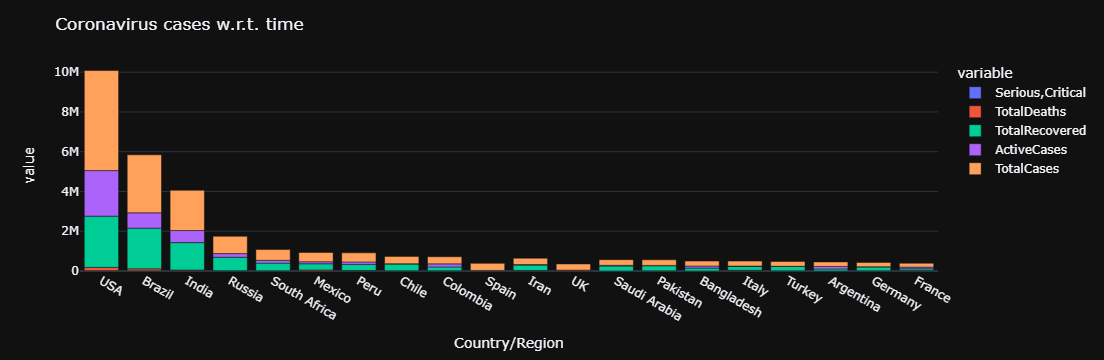

In [19]:
fig.update_layout({'title':"Coronavirus cases w.r.t. time"})
fig.show()

## 5. Top 20 countries of Total Confirmed Cases, Total Recovered Cases, Total Deaths,Total Active Cases

In [20]:
world_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [21]:
world_data['Country/Region'].nunique()

209

### Top 20 countries of Total Confirmed cases

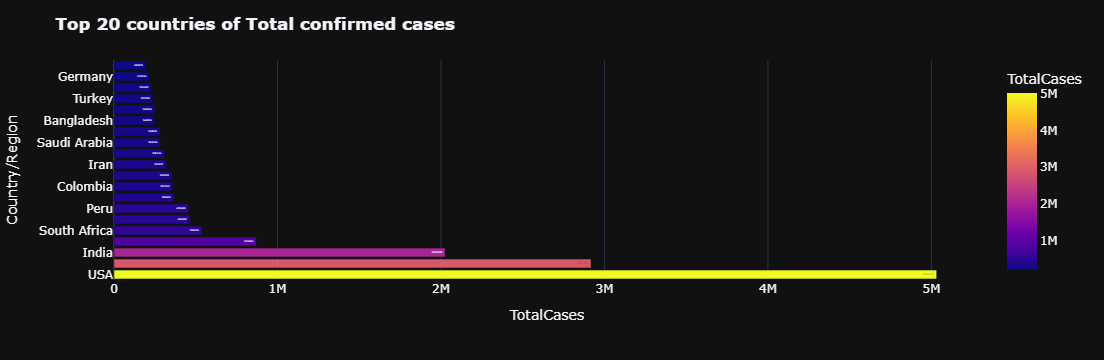

In [22]:
fig=px.bar(world_data.iloc[0:20],y='Country/Region',x='TotalCases',color='TotalCases',text="TotalCases")
fig.update_layout(template="plotly_dark",title_text="<b>Top 20 countries of Total confirmed cases</b>")
fig.show()

### Top 20 countries of Total deaths

In [22]:
fig=px.bar(world_data.sort_values(by='TotalDeaths',ascending=False)[0:20],y='Country/Region',x='TotalDeaths',color='TotalDeaths',text="TotalDeaths")
fig.update_layout(template="plotly_dark",title_text="<b>Top 20 countries of Total deaths</b>")
fig.show()

### Top 20 countries of Total active cases

In [23]:
fig=px.bar(world_data.sort_values(by='ActiveCases',ascending=False)[0:20], y='Country/Region',x='ActiveCases',color='ActiveCases',text='ActiveCases')
fig.update_layout(template="plotly_dark",title_text="<b>Top 20 countries of Total Active cases")
fig.show()

### Top 20 countries of Total Recoveries

In [24]:
fig=px.bar(world_data.sort_values(by='TotalRecovered',ascending=False)[:20],y='Country/Region',x='TotalRecovered',color='TotalRecovered',text='TotalRecovered')
fig.update_layout(template="plotly_dark",title_text="<b>Top 20 countries of Total Recovered")
fig.show()

In [25]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [26]:
world_data[0:15]['Country/Region'].values

array(['USA', 'Brazil', 'India', 'Russia', 'South Africa', 'Mexico',
       'Peru', 'Chile', 'Colombia', 'Spain', 'Iran', 'UK', 'Saudi Arabia',
       'Pakistan', 'Bangladesh'], dtype=object)

## 6.  Pie Chart Representation of stats of worst affected countries.
#### Pie Charts in Donut Shape

In [27]:
labels=world_data[0:15]['Country/Region'].values
cases=['TotalCases','TotalDeaths','TotalRecovered','ActiveCases']
for i in cases:
    fig=px.pie(world_data[0:15],values=i,names=labels,template="plotly_dark",hole=0.3,title=" {} Recordeded w.r.t. to WHO Region of 15 worst effected countries ".format(i))
    fig.show()

### Deaths to Confirmed ratio

In [28]:
deaths_to_confirmed=((world_data['TotalDeaths']/world_data['TotalCases']))
fig = px.bar(world_data,x='Country/Region',y=deaths_to_confirmed)
fig.update_layout(title={'text':"Death to confirmed ratio of some  worst effected countries",'xanchor':'left'},template="plotly_dark")
fig.show()


### Deaths to recovered ratio

In [29]:
deaths_to_recovered=((world_data['TotalDeaths']/world_data['TotalRecovered']))
fig = px.bar(world_data,x='Country/Region',y=deaths_to_recovered)
fig.update_layout(title={'text':"Death to recovered ratio of some  worst effected countries",'xanchor':'left'},template="plotly_dark")
fig.show()


### Tests to Confirmed Ratio

In [30]:
tests_to_confirmed=((world_data['TotalTests']/world_data['TotalCases']))
fig = px.bar(world_data,x='Country/Region',y=tests_to_confirmed)
fig.update_layout(title={'text':"Tests to confirmed ratio of some  worst effected countries",'xanchor':'left'},template="plotly_dark")
fig.show()

### Serious to Deaths Ratio

In [31]:
serious_to_death=((world_data['Serious,Critical']/world_data['TotalDeaths']))
fig = px.bar(world_data,x='Country/Region',y=serious_to_death)
fig.update_layout(title={'text':"serious to Death ratio of some  worst effected countries",'xanchor':'left'},template="plotly_dark")
fig.show()

##  7. Visualize Confirmed,  Active,  Recovered , Deaths Cases(entire statistics ) of a particular country

In [32]:
group_data.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [23]:
from plotly.subplots import make_subplots  ## for creating subplots in plotly
import plotly.graph_objects as go

In [24]:

def country_visualization(group_data,country):
    
    data=group_data[group_data['Country/Region']==country]
    df=data.loc[:,['Date','Confirmed','Deaths','Recovered','Active']]
    fig = make_subplots(rows=1, cols=4,subplot_titles=("Confirmed", "Active", "Recovered",'Deaths'))
    fig.add_trace(
        go.Scatter(name="Confirmed",x=df['Date'],y=df['Confirmed']),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(name="Active",x=df['Date'],y=df['Active']),
        row=1, col=2
    )
    fig.add_trace(
        go.Scatter(name="Recovered",x=df['Date'],y=df['Recovered']),
        row=1, col=3
    )

    fig.add_trace(
        go.Scatter(name="Deaths",x=df['Date'],y=df['Deaths']),
        row=1, col=4
    )

    fig.update_layout(height=600, width=1000, title_text="Date Vs Recorded Cases of {}".format(country),template="plotly_dark")
    fig.show()

In [36]:
country_visualization(group_data,'US')

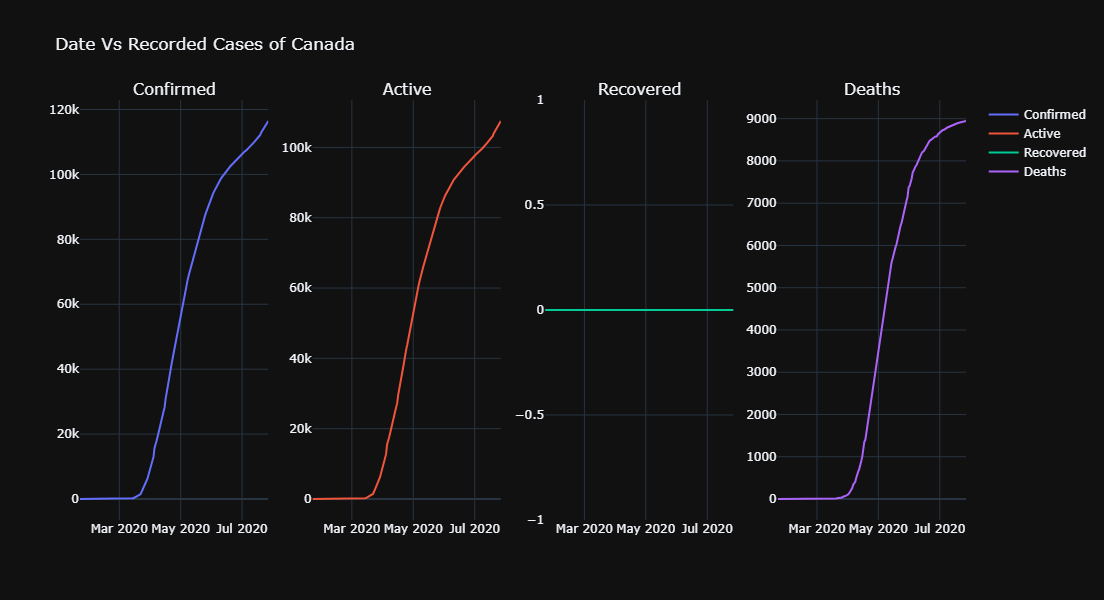

In [27]:
country_visualization(group_data,'Canada')